# 予測モデルを作ってみよう

## 前処理の実習 p56

### 必要なライブラリーをインポート

In [1]:
% matplotlib inline
from __future__ import print_function

import copy
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

matplotlib.style.use('ggplot')

### データの読み込み p57

In [2]:
dataset = pd.read_csv('dataset/kc_house_data.csv')

In [3]:
dataset.head()  # 先頭の5行表示

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
print('Number of Rows: %i  Number of Columns: %i' % dataset.shape)

Number of Rows: 21613  Number of Columns: 21


### データの理解
#### データの要約統計量の確認

In [5]:
dataset.describe()  # 要約統計量を出してくれる

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


- mean: 平均
- std: 標準偏差

#### データのスライシング

In [6]:
dataset.ix[0:3]  # ixはインデックスのこと。

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000


In [7]:
dataset.ix[:3][['price', 'bedrooms']]

,price,bedrooms
0,221900.0,3
1,538000.0,3
2,180000.0,2
3,604000.0,4


In [8]:
dataset.price[:3]

0    221900.0
1    538000.0
2    180000.0
Name: price, dtype: float64

In [9]:
dataset['sqft_total'] = dataset['sqft_above'] + dataset['sqft_basement']

In [10]:
dataset.ix[0:9][['id', 'sqft_above', 'sqft_basement', 'sqft_total']]

,id,sqft_above,sqft_basement,sqft_total
0,7129300520,1180,0,1180
1,6414100192,2170,400,2570
2,5631500400,770,0,770
3,2487200875,1050,910,1960
4,1954400510,1680,0,1680
5,7237550310,3890,1530,5420
6,1321400060,1715,0,1715
7,2008000270,1060,0,1060
8,2414600126,1050,730,1780
9,3793500160,1890,0,1890


#### 特定の列に対し一括で関数を適用させる方法 p60
pandas.apply() 適用する

In [11]:
def date_str2year(x):
    # 最初の4文字を取り出せば、年になる。
    return int(x[:4])

def date_str2month(x):
    # 5文字目から6文字目を取り出せば、月になる
    return int(x[4:6])

In [12]:
dataset['date_year'] = dataset['date'].apply(date_str2year)
dataset['date_month'] = dataset['date'].apply(date_str2month)
dataset.ix[0:9][['id','date', 'date_year', 'date_month']]

,id,date,date_year,date_month
0,7129300520,20141013T000000,2014,10
1,6414100192,20141209T000000,2014,12
2,5631500400,20150225T000000,2015,2
3,2487200875,20141209T000000,2014,12
4,1954400510,20150218T000000,2015,2
5,7237550310,20140512T000000,2014,5
6,1321400060,20140627T000000,2014,6
7,2008000270,20150115T000000,2015,1
8,2414600126,20150415T000000,2015,4
9,3793500160,20150312T000000,2015,3


#### ダミー変数の作り方 p61

In [13]:
dataset = pd.get_dummies(data=dataset, columns=['view'])

In [14]:
dataset.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'sqft_total', 'date_year', 'date_month',
       'view_0', 'view_1', 'view_2', 'view_3', 'view_4'],
      dtype='object')

#### 条件を指定した行のフィルタリング

In [15]:
# ベットルームがない物件を抽出
dataset[dataset['bedrooms'] < 1]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,...,sqft_living15,sqft_lot15,sqft_total,date_year,date_month,view_0,view_1,view_2,view_3,view_4
875,6306400140,20140612T000000,1095000.0,0,0.00,3064,4764,3.5,0,3,...,2360,4000,3064,2014,6,0,0,1,0,0
3119,3918400017,20150205T000000,380000.0,0,0.00,1470,979,3.0,0,3,...,1470,1399,1470,2015,2,0,0,1,0,0
3467,1453602309,20140805T000000,288000.0,0,1.50,1430,1650,3.0,0,3,...,1430,1650,1430,2014,8,1,0,0,0,0
4868,6896300380,20141002T000000,228000.0,0,1.00,390,5900,1.0,0,2,...,2170,6000,390,2014,10,1,0,0,0,0
6994,2954400190,20140624T000000,1295650.0,0,0.00,4810,28008,2.0,0,3,...,4740,35061,4810,2014,6,1,0,0,0,0
8477,2569500210,20141117T000000,339950.0,0,2.50,2290,8319,2.0,0,3,...,2500,8751,2290,2014,11,1,0,0,0,0
8484,2310060040,20140925T000000,240000.0,0,2.50,1810,5669,2.0,0,3,...,1810,5685,1810,2014,9,1,0,0,0,0
9773,3374500520,20150429T000000,355000.0,0,0.00,2460,8049,2.0,0,3,...,2520,8050,2460,2015,4,1,0,0,0,0
9854,7849202190,20141223T000000,235000.0,0,0.00,1470,4800,2.0,0,3,...,1060,7200,1470,2014,12,1,0,0,0,0
12653,7849202299,20150218T000000,320000.0,0,2.50,1490,7111,2.0,0,3,...,1500,4675,1490,2015,2,1,0,0,0,0


In [16]:
# ベットルームとバスルームがない物件を抽出
dataset[np.logical_and((dataset['bedrooms'] < 1), (dataset['bathrooms'] < 1))]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,...,sqft_living15,sqft_lot15,sqft_total,date_year,date_month,view_0,view_1,view_2,view_3,view_4
875,6306400140,20140612T000000,1095000.0,0,0.00,3064,4764,3.5,0,3,...,2360,4000,3064,2014,6,0,0,1,0,0
3119,3918400017,20150205T000000,380000.0,0,0.00,1470,979,3.0,0,3,...,1470,1399,1470,2015,2,0,0,1,0,0
6994,2954400190,20140624T000000,1295650.0,0,0.00,4810,28008,2.0,0,3,...,4740,35061,4810,2014,6,1,0,0,0,0
9773,3374500520,20150429T000000,355000.0,0,0.00,2460,8049,2.0,0,3,...,2520,8050,2460,2015,4,1,0,0,0,0
9854,7849202190,20141223T000000,235000.0,0,0.00,1470,4800,2.0,0,3,...,1060,7200,1470,2014,12,1,0,0,0,0
14423,9543000205,20150413T000000,139950.0,0,0.00,844,4269,1.0,0,4,...,1380,9600,844,2015,4,1,0,0,0,0
18379,1222029077,20141029T000000,265000.0,0,0.75,384,213444,1.0,0,3,...,1920,224341,384,2014,10,1,0,0,0,0
19452,3980300371,20140926T000000,142000.0,0,0.00,290,20875,1.0,0,1,...,1620,22850,290,2014,9,1,0,0,0,0


#### ヒストグラム

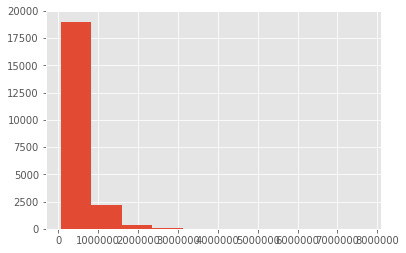

In [17]:
dataset['price'].hist()

#### 散布図

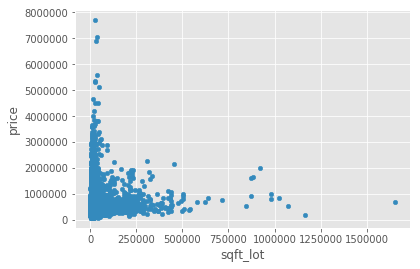

In [18]:
dataset.plot(kind='scatter', x='sqft_lot', y='price')

- sqft_lot: 駐車場の広さ
- price: 家賃

#### Grop Byで集計して棒グラフ

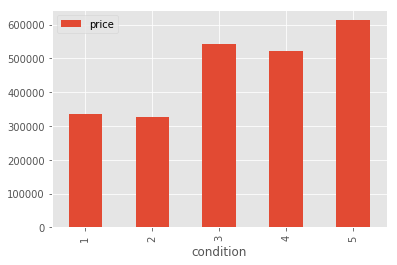

In [19]:
price_by_condition = \
 dataset.groupby('condition').aggregate({'price': np.mean}).reset_index()
price_by_condition.plot.bar(x='condition')

#### 箱ひげ図

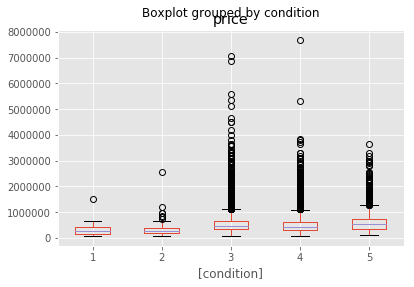

In [20]:
dataset[['condition', 'price']].boxplot(by='condition')

#### 欠損値の確認

In [21]:
# 各列ごとにチェック
col_names = dataset.columns
for col_name in col_names:
    missing_num = sum(pd.isnull(dataset[col_name]))
    print(col_name, ': # of missing record:', missing_num)

id : # of missing record: 0
date : # of missing record: 0
price : # of missing record: 0
bedrooms : # of missing record: 0
bathrooms : # of missing record: 0
sqft_living : # of missing record: 0
sqft_lot : # of missing record: 0
floors : # of missing record: 0
waterfront : # of missing record: 0
condition : # of missing record: 0
grade : # of missing record: 0
sqft_above : # of missing record: 0
sqft_basement : # of missing record: 0
yr_built : # of missing record: 0
yr_renovated : # of missing record: 0
zipcode : # of missing record: 0
lat : # of missing record: 0
long : # of missing record: 0
sqft_living15 : # of missing record: 0
sqft_lot15 : # of missing record: 0
sqft_total : # of missing record: 0
date_year : # of missing record: 0
date_month : # of missing record: 0
view_0 : # of missing record: 0
view_1 : # of missing record: 0
view_2 : # of missing record: 0
view_3 : # of missing record: 0
view_4 : # of missing record: 0


In [22]:
# applyを使って欠損を確認する方法
missing_check = dataset.copy()
missing_check = missing_check.apply(pd.isnull, axis=1)
missing_check.apply(sum, axis=0)

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
sqft_total       0
date_year        0
date_month       0
view_0           0
view_1           0
view_2           0
view_3           0
view_4           0
dtype: int64

### 特徴量の設計
#### フィーチャーエンジニアリング
新しい特徴量の作成

In [23]:
dataset['sqft_living_div_sqft_living15'] = dataset['sqft_living'] / (dataset['sqft_living15'] + 0.001)

In [24]:
def check_renovated(x):
    res = True
    if int(x) == 0:
        res = False
    return res

In [25]:
# リノベーションされているかどうか
dataset['renovated'] = dataset['yr_renovated'].apply(check_renovated)

In [26]:
dataset.ix[:5][['id', 'sqft_living', 'sqft_living15', 'sqft_living_div_sqft_living15', 'renovated']]

,id,sqft_living,sqft_living15,sqft_living_div_sqft_living15,renovated
0,7129300520,1180,1340,0.880596,False
1,6414100192,2570,1690,1.520709,True
2,5631500400,770,2720,0.283088,False
3,2487200875,1960,1360,1.441175,False
4,1954400510,1680,1800,0.933333,False
5,7237550310,5420,4760,1.138655,False


## モデルの作成 p71
### 機械学習アルゴリズムを学ぶ上でのポイント
教師あり機械学習アルゴリズムを勉強する上で押さえるポイント
- 取れるターゲット変数
    - 連続値
    - フラグ
- 目的関数
- 関数の形
- ハイパーパラメーター
- 解釈可能性と予測性能

### 線形回帰モデル
- 取れるターゲット変数: 連続値
- 目的関数: 残差の二乗を最小化するように傾きや切片を調整する関数
- 関数の形: 直線
- ハイパーパラメーター: なし
- 解釈可能性と予測性能: 解釈可能性は高い一方予測性能はあまり高くはない

### 回帰木（決定木）
- 決定木: ターゲット変数がカテゴリ
- 回帰木: ターゲット変数が連續値

今月しか使えないルールを作ってしまうことを過学習（オーバー・フィッティング）と言います。決定木は過学習が起きやすいと言われている。

#### 決定木の要件
- 取れるターゲット変数: クラス
- 目的関数: 純度
- 関数の形: ツリー（IF-THENルール）
- ハイパーパラメーター: 木の深さ
- 解釈可能性と予測性能: 解釈可能性は高い一方予測性能はあまり高くはない

#### 回帰木の要件
- 取れるターゲット変数: 連続値
- 目的関数: 分散
- 関数の形: ツリー（IF-THENルール）
- ハイパーパラメーター: 木の深さ
- 解釈可能性と予測性能: 解釈可能性は高い一方予測性能はあまり高くはない

### ランダムフォレスト
- 取れるターゲット変数: フラグでも連続数値でも大丈夫
- 目的関数: ツリーに準ずる
- 関数の形: ツリーの多数決
- ハイパーパラメーター: 木の深さ、木の数、サンプリングする列の数
- 解釈可能性と予測性能: 解釈可能性はそこそこ。予測性能は高い。

## モデルの評価 p82

In [35]:
# ライブラリのインポート
# 線形回帰モデル
from sklearn.linear_model import LinearRegression

# 回帰木
from sklearn.tree import DecisionTreeRegressor

# ランダムフォレスト
from sklearn.ensemble import RandomForestRegressor

# グッドリサーチ
from sklearn.grid_search import GridSearchCV

# 学習データとテストデータの分割するための関数
from sklearn.cross_validation import train_test_split

# 平均二乗誤差（MSE）を計算するための関数
from sklearn.metrics import mean_squared_error

In [36]:
# ターゲット変数と予測に用いるデータの準備
target_col = 'price'
exclude_cols = ['price', 'id', 'date']
feature_cols = [col for col in dataset.columns if col not in exclude_cols]

In [37]:
feature_cols

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'sqft_total',
 'date_year',
 'date_month',
 'view_0',
 'view_1',
 'view_2',
 'view_3',
 'view_4',
 'sqft_living_div_sqft_living15',
 'renovated']

In [38]:
y = np.array(dataset[target_col])
X = np.array(dataset[feature_cols])

In [39]:
# 学習データとテストデータの分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

In [40]:
# 更にモデルを学習させるためのデータと途中の制度確認用データに分ける
X_train1, X_train2, y_train1, y_train2 = train_test_split(X_train, y_train, test_size=0.3, random_state=1234)

In [41]:
# 線形回帰モデル
lm = LinearRegression()  
lm.fit(X_train1, y_train1)  # 投入されたデータに基づいて学習を行う
y_pred2 = lm.predict(X_train2)  # 予測値を出力
lm_mse = mean_squared_error(y_train2, y_pred2)  # 平均二乗誤差を計算
print('LinerRegression MSE: ', lm_mse)

LinerRegression MSE:  41122303259.8


In [42]:
# 回帰木
dt = DecisionTreeRegressor()
dt.fit(X_train1, y_train1)
y_pred2 = dt.predict(X_train2)
dt_mse = mean_squared_error(y_train2, y_pred2)  # 平均二乗誤差を計算
print('DT MSE: ', dt_mse)

DT MSE:  41237878079.2


In [43]:
# ランダムフォレスト
rf = RandomForestRegressor(random_state=1234)
rf.fit(X_train1, y_train1)
y_pred2 = rf.predict(X_train2)
rf_mse = mean_squared_error(y_train2, y_pred2)  # 平均二乗誤差を計算
print('RandomForest MSE: ', rf_mse)

RandomForest MSE:  24540962734.5


In [44]:
algos = ['LinerRegression', 'DecisionTree', 'RandomForest']
mses = [lm_mse,dt_mse, rf_mse]
print('Best Alogorithms : ', algos[np.argmin(mses)] )

Best Alogorithms :  RandomForest


In [60]:
# 変数の選択
def get_gfs_feature_indices(X, y, features, clf):
    # データの分割
    X_train_, X_test_, y_train_, y_test_ = train_test_split(X, y, test_size=0.3, random_state=1234)
    # 辞書作成
    feature_indices = {feature: idx for idx, feature in enumerate(features)}
    # 重複削除
    features = set(features)
    # 無限大で初期化
    last_mse = np.inf
    # 初期化
    chosen_features = set()
    while len(chosen_features) < len(features):
        mse_features = []
        for feature in (features - chosen_features):
            candidates = chosen_features.union(set([feature]))
            indices = [feature_indices[feature] for feature in candidates]
            # print(feature, candidates, indices)
            # ランダムフォレストで学習
            clf.fit(X_train_[:, indices], y_train_)
            # 予測値を出力
            y_pred = clf.predict(X_test_[:, indices])
            # 平均二乗誤差を計算
            mse = mean_squared_error(y_test_, y_pred)
            mse_features += [(mse, feature)]
        mse, feature = min(mse_features)
        if mse >= last_mse:
            break
        last_mse = mse
        print('Newly Added Feature: {},\tMSE Score: {}'.format(feature, mse))
        chosen_features.add(feature)
    return [feature_indices[feature] for feature in chosen_features]

In [61]:
# 実行
selected_feature_index = get_gfs_feature_indices(X=X_train, y=y_train, features=feature_cols, clf=RandomForestRegressor(random_state=1234))

Newly Added Feature: grade,	MSE Score: 69167238833.2835
Newly Added Feature: zipcode,	MSE Score: 38579439728.86474
Newly Added Feature: view_4,	MSE Score: 32541956711.136333
Newly Added Feature: sqft_living,	MSE Score: 30681758667.871426
Newly Added Feature: lat,	MSE Score: 24835597583.9156
Newly Added Feature: yr_built,	MSE Score: 22321984623.95815
Newly Added Feature: bedrooms,	MSE Score: 22191883748.12489
Newly Added Feature: view_3,	MSE Score: 21412812456.106113
Newly Added Feature: renovated,	MSE Score: 20819108707.843056
Newly Added Feature: condition,	MSE Score: 20793308639.77149


In [62]:
selected_feature_index

[26, 23, 10, 0, 6, 13, 24, 7, 12, 2]

np.inf

参考: http://stackoverflow.com/questions/42315541/difference-between-np-inf-and-floatinf

https://docs.python.jp/3/library/functions.html#float



In [63]:
rf = RandomForestRegressor(random_state=1234)
rf.fit(X_train1[:, selected_feature_index], y_train1)
y_pred2 = rf.predict(X_train2[:, selected_feature_index])
rf_mse = mean_squared_error(y_train2, y_pred2)
print('RandomForest MSE: ', rf_mse)

RandomForest MSE:  20794171588.1


In [66]:
# クロスバリデーションによるパラメーターのチューニング
rf = RandomForestRegressor(random_state=1234)
params = {'n_estimators': [10, 50, 100], 'max_depth': [5, 10, 50]}
gscv = GridSearchCV(rf, param_grid=params, verbose=1, cv=3, scoring='neg_mean_squared_error')
gscv.fit(X_train1[:, selected_feature_index], y_train1)
gscv.best_params_

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:   19.1s finished


{'max_depth': 50, 'n_estimators': 100}

In [67]:
# 精度確認
rf = RandomForestRegressor(n_estimators=100, max_depth=50, random_state=1234)
rf.fit(X_train1[:, selected_feature_index ], y_train1)
y_pred2 = rf.predict(X_train2[:, selected_feature_index])
rf_mse = mean_squared_error(y_train2, y_pred2)
print('RandomForest MSE: ', rf_mse)

RandomForest MSE:  20378719480.5


In [68]:
# モデルの評価
# 最後に答え合わせ
rf = RandomForestRegressor(n_estimators=100, max_depth=50, random_state=1234)
rf.fit(X_train[:, selected_feature_index], y_train)
y_pred_on_test = rf.predict(X_test[:, selected_feature_index])
rf_mse = mean_squared_error(y_test, y_pred_on_test)
print('RandomForest MSE: ', rf_mse)

RandomForest MSE:  22426156560.2


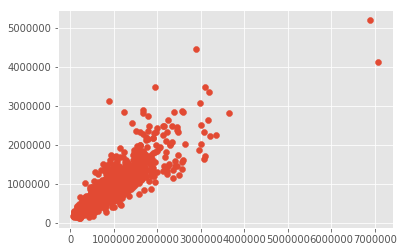

In [69]:
# 予測数値と実際の値の散布図
plt.scatter(y_test, y_pred_on_test)

Mean:  -0.0326705959665
Std:  0.214027652965


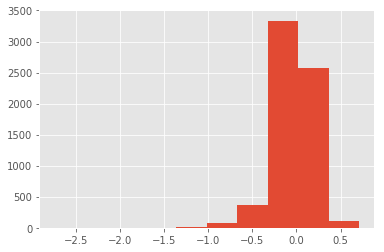

In [70]:
# 誤差のヒストグラム
error_rate = (y_test - y_pred_on_test) / y_test
plt.hist(error_rate)
print('Mean: ', np.mean(error_rate))
print('Std: ', np.std(error_rate))